# Introduction

This notebook is an implementation of Jón Daníelsson's _Financial Risk Forecasting_ (Wiley, 2011) in Julia v1.7.3, with annotations and introductory examples. The introductory examples (Appendix) are similar to Appendix B/C in the original book, with an emphasis on the differences between R/MATLAB and Julia.

Bullet point numbers correspond to the R/MATLAB Listing numbers in the original book, referred to henceforth as _FRF_.

More details can be found at the book website: https://www.financialriskforecasting.com/

Last updated: June 2022

Copyright 2011-2020 Jón Daníelsson. This code is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This code is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. The GNU General Public License is available at: https://www.gnu.org/licenses/.

<a id='top'></a>
## Table of Contents 
[Chapter 0. Appendix - Introduction](#0) <br>
[Chapter 1. Financial Markets, Prices and Risk](#1) <br>
[Chapter 2. Univariate Volatility Modeling](#2) <br>
[Chapter 3. Multivariate Volatility Models](#3) <br>
[Chapter 4. Risk Measures](#4) <br>
[Chapter 5. Implementing Risk Forecasts](#5) <br>
[Chapter 6. Analytical Value-at-Risk for Options and Bonds](#6) <br>
[Chapter 7. Simulation Methods for VaR for Options and Bonds](#7) <br>
[Chapter 8. Backtesting and Stress Testing](#8) <br>
[Chapter 9. Extreme Value Theory](#9) <br>

<a id='0'></a>
***

# Appendix: An Introduction to Julia

Created in Julia 1.7.3 (June 2022)

-  J.1: Entering and Printing Data
-  J.2: Vectors, Matrices and Sequences
-  J.3: Importing Data (to be updated)
-  J.4: Basic Summary Statistics
-  J.5: Calculating Moments
-  J.6: Basic Matrix Operations
-  J.7: Statistical Distributions
-  J.8: Statistical Tests
-  J.9: Time Series
-  J.10: Loops and Functions
-  J.11: Basic Graphs
-  J.12: Miscellaneous Useful Functions

In [1]:
# Entering and Printing Data in Julia
# Listing J.1
# Last updated June 2018
#
#

x = 10             # assign x the value 10
println(x)         # print x

## println() puts next output on new line, while print() doesn't

10


In [2]:
# Vectors, Matrices and Sequences in Julia
# Listing J.2
# Last updated July 2020
#
#

y = [1,3,5,7,9]     # lists in square brackets are stored as arrays

println(y)

println(y[3])       # calling 3rd element (Julia indices start at 1)

println(size(y))    # size of y

println(length(y))  # as expected, y has length 5

v = fill!(Matrix{Float64}(undef, 2,3),NaN) # 2x3 Float64 matrix of NaNs - computationally better
v = fill(NaN, (2,3))                       # 2x3 Float64 matrix of NaNs - direct

println(v)          # Julia prints matrices in a single line

println(size(v))    # as expected, v is size (2,3)

w = repeat([1,2,3]', outer = [3,2]) # repeats matrix thrice by rows, twice by columns

println(w)

s = 1:10            # s is an sequence which one can loop across

println(collect(s)) # return sequence elements as an array

[1, 3, 5, 7, 9]
5
(5,)
5
[NaN NaN NaN; NaN NaN NaN]
(2, 3)
[1 2 3 1 2 3; 1 2 3 1 2 3; 1 2 3 1 2 3]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [3]:
# Basic Summary Statistics in Julia
# Listing J.3
# Last updated July 2020
#
#

y = [3.14,15,9.26,5]

using Statistics;                # load package needed
println("sum: ", sum(y))         # return sum of all elements of y
println("product: ", prod(y))    # return product of all elements of y
println("max: ", maximum(y))     # return maximum value of y
println("min: ", minimum(y))     # return minimum value of y
println("mean: ", mean(y))       # arithmetic mean
println("median: ", median(y))   # median
println("variance: ", var(y))    # variance
println("cov_matrix: ", cov(y))  # covar matrix = variance for single vector
println("cor_matrix: ", cor(y))  # corr matrix = [1] for single vector
println(sort(y))                 # sorts y in ascending order
println(log.(y))                 # natural log, note . denotes elementwise operation

sum: 32.4
product: 2180.73
max: 15.0
min: 3.14
mean: 8.1
median: 7.13
variance: 27.722400000000004
cov_matrix: 27.722400000000004
cor_matrix: 1.0
[3.14, 5.0, 9.26, 15.0]
[1.144222799920162, 2.70805020110221, 2.225704048658088, 1.6094379124341003]


In [4]:
# Calculating Moments in Julia
# Listing J.4
# Last updated June 2018
#
#

using StatsBase;

println("mean: ", mean(y))          # mean
println("variance: ", var(y))       # variance
println("std dev: ", std(y))        # unbiased standard deviation
println("skewness: ", skewness(y))  # skewness
println("kurtosis: ", kurtosis(y))  # EXCESS kurtosis (note the different default)

mean: 8.1
variance: 27.722400000000004
std dev: 5.265206548655049
skewness: 0.47004939528995604
kurtosis: -1.2846861061904815


In [5]:
# Basic Matrix Operations in Julia
# Listing J.5
# Last updated June 2018
#
#

z = Matrix([[1 2];[3 4]])   # z is a 2 x 2 matrix
x = Matrix([1 2])           # x is a 1 x 2 matrix

## Note: z * x is undefined since the two matrices are not conformable

println(z * x')             # this evaluates to a 2 x 1 matrix

b = vcat(z,x)               # "stacking" z and x vertically
c = hcat(z,x')              # "stacking" z and x' horizontally 

## Note: dimensions must match along the combining axis

[5; 11;;]


2×3 Matrix{Int64}:
 1  2  1
 3  4  2

In [6]:
# Statistical Distributions in Julia
# Listing J.6
# Last updated July 2020
#
#

## Julia has a wide range of functions contained in the package Distributions.jl
## Vectorized versions of the functions are used here as they are relevant for FRF

using Distributions;

q = collect((-3:1:3))              # specify a set of values

p = collect((0.1:0.1:0.9))         # specify a set of probabilities

println(quantile.(Normal(0,1),p))  # element-wise inverse Normal quantile

println(cdf.(TDist(4), q))         # element-wise cdf calculation under Student-t(4)

println(pdf.(Chisq(2), q))         # element-wise pdf calculation under Chisq(2)

## Similar syntax for other dists, e.g. Bernoulli(p), Binomial(n,p), Poisson(λ)

## For full list of supported distributions, see Distributions.jl documentation

## One can also obtain pseudorandom samples from distributions using rand()

x = rand(TDist(5), 100)            # Sampling 100 times from TDist with 5 df

y = rand(Normal(0,1), 50)          # Sampling 50 times from a standard normal 

## Given data, we obtain MLE estimates of parameters with fit_mle():

fit_mle(Normal, x)                 # Fitting x to normal dist     

## Some distributions like the Student-t cannot be fitted yet (as of July 2020)
## Supported dists: https://juliastats.org/Distributions.jl/stable/fit/

[-1.2815515655446004, -0.8416212335729143, -0.5244005127080409, -0.2533471031357997, 0.0, 0.2533471031357997, 0.5244005127080407, 0.8416212335729143, 1.2815515655446004]
[0.019970984035859413, 0.05805826175840775, 0.1869504831500295, 0.5, 0.8130495168499705, 0.9419417382415922, 0.9800290159641406]
[0.0, 0.0, 0.0, 0.5, 0.3032653298563167, 0.18393972058572114, 0.11156508007421491]


Normal{Float64}(μ=-0.08351240461430262, σ=1.3479498728939758)

In [7]:
# Statistical Tests in Julia
# Listing J.7
# Last updated July 2020
#
#

using Random, HypothesisTests; # loading required packages

Random.seed!(100)                # set random seed        
x = rand(TDist(5), 500)          # create hypothetical dataset x

println(JarqueBeraTest(x))       # Jarque-Bera test for normality
println(LjungBoxTest(x,20))      # Ljung-Box test for serial correlation

Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "-0.02625371325018951 and 5.7924335679490655"

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-35

Details:
    number of observations:         500
    JB statistic:                   162.509

Ljung-Box autocorrelation test
------------------------------
Population details:
    parameter of interest:   autocorrelations up to lag k
    value under h_0:         "all zero"
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.9101

Details:
    number of observations:         500
    number of lags:                 20
    degrees of freedom correction:  0
    Q statistic:                    12.171



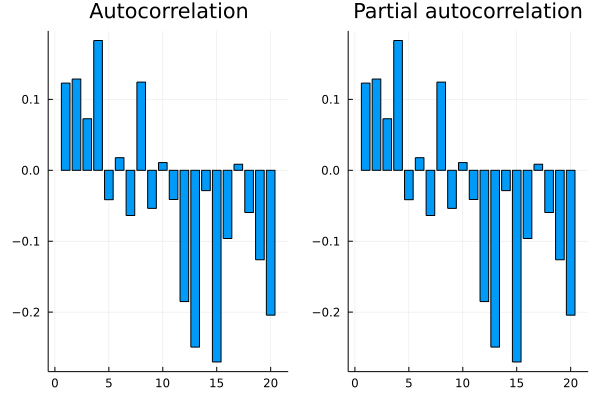

In [8]:
# Time Series in Julia
# Listing J.8
# Last updated July 2020
#
#

using Plots;

Random.seed!(100)
x = rand(TDist(5), 60)           # Create hypothetical dataset x

acf = autocor(x, 1:20)           # autocorrelation for lags 1:20
pacf = autocor(x, 1:20)          # partial autocorrelation for lags 1:20

## Plotting using Plots.jl
plot(bar(acf, title = "Autocorrelation", legend = false), bar(pacf, title = "Partial autocorrelation", legend = false)) 

In [9]:
# Loops and Functions in Julia
# Listing J.9
# Last updated July 2020
#
#


## For loops

for i in range(3,length = 5)        # using range with the "length" option
    println(i^2)                    # where n = number of terms      
    end                             # this iterates over [3,4,5,6,7]

## If-else loops

X = 10

if X % 3 == 0
    println("X is a multiple of 3")
else
    println("X is not a multiple of 3")
end

## Functions (example: a simple excess kurtosis function)

using Statistics;

function excess_kurtosis(x, excess = 3)::Float64      # excess optional, default = 3
    m4 = mean((x .- mean(x)).^4)                      # element-wise exponentiation .^
    excess_kurt = m4/(std(x)^4) - excess
    return excess_kurt
end

using Random, Distributions;

Random.seed!(100)
x = rand(TDist(5), 60)           # Create hypothetical dataset x

excess_kurtosis(x)               

## Note: we have forced output to be of type Float64 by the type declaration above

9
16
25
36
49
X is not a multiple of 3


4.753425237265262

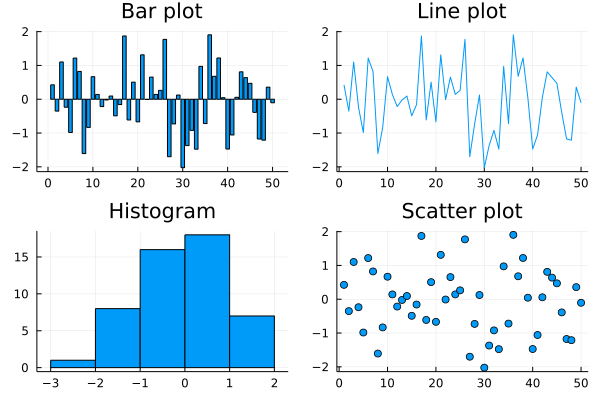

In [10]:
# Basic Graphs in Julia
# Listing J.10
# Last updated July 2020
#
#

## For the simple plots in FRF we use Plots.jl 
## Full documentation at http://docs.juliaplots.org/latest/

## By default, Plots.jl uses the GR backend, sufficient for plots done in FRF
## Alternative backends are also available, e.g. Plotly, PlotlyJS

y = rand(Normal(0,1), 50)

## Plotting barplot, lineplot, histogram, scatterplot of y

return plot(bar(y, title = "Bar plot"), plot(y, title = "Line plot"), 
    histogram(y, title = "Histogram"), scatter(y, title = "Scatter plot"), legend = false)

## Wrapping plot(...) around multiple plots allows for automatic subplotting
## Options in wrapped plot(...) apply to all subplots
## Plot individual graphs using histogram(y), bar(y), etc. directly

## More examples using GR (plus syntax for customizations) can be found online:
## https://docs.juliaplots.org/latest/generated/gr/

In [11]:
# Miscellaneous Useful Functions in Julia
# Listing J.11
# Last updated July 2020
#
#

## 1) To convert objects from one type to another, use convert(Type, object)
##    To check type, use typeof(object)

x = 8.0

println(typeof(x))

x = convert(Int, 8.0)

println(typeof(x))

## 2) To type Greek letters, type \ + name + Tab in succession
##    e.g. \gammaTab gives you γ and \GammaTab gives you Γ 
##
##    Greek letters are sometimes essential in retrieving parameters from functions
##    e.g. res = fit_mle(Normal, x) will return an object res of type Distribution
##    with fitted parameters res.μ and res.σ

y = rand(Normal(0,1), 100)
res = fit_mle(Normal, y)
println("Fitted mean: ", res.μ)
println("Fitted sd: ", res.σ)

Float64
Int64
Fitted mean: 0.044317955654009006
Fitted sd: 1.1058746524691687


<a id='1'></a>
***

# Chapter 1: Financial Markets, Prices and Risk

-  1.1/1.2: Loading hypothetical stock prices, converting to returns, plotting returns
-  1.3/1.4: Summary statistics for returns timeseries
-  1.5/1.6: Autocorrelation function (ACF) plots, Ljung-Box test
-  1.7/1.8: Quantile-Quantile (QQ) plots
-  1.9/1.10: Correlation matrix between different stocks

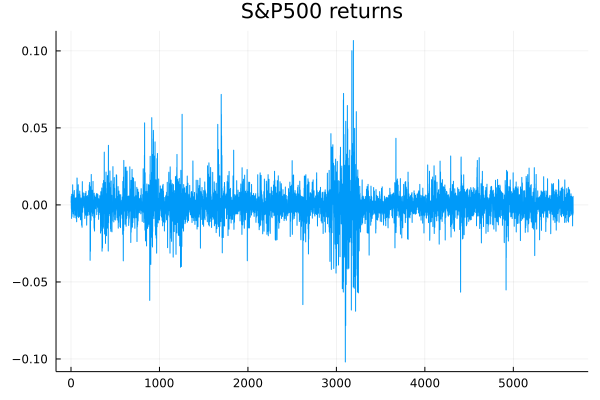

In [12]:
# Download S&P 500 data in Julia
# Listing 1.1/1.2
# Last updated June 2022
#
#

using CSV, DataFrames;

price = CSV.read("index.csv",DataFrame)
y = diff(log.(price[:,1]))

using Plots;
plot(y, title = "S&P500 returns", legend = false)

In [13]:
# Sample statistics in Julia
# Listing 1.3/1.4
# Last updated July 2020
#
#

using Statistics, StatsBase;

println("Standard deviation: ", std(y), "\n")
println("Minimum value: ", minimum(y), "\n")
println("Maximum value: ", maximum(y), "\n")
println("Skewness: ", skewness(y), "\n")
println("Kurtosis: ", kurtosis(y), "\n")
println("Autocorrelation of returns:", "\n", autocor(y, 1:20), "\n")
println("Autocorrelation of returns squared:", "\n", autocor(y.^2, 1:20), "\n")

using HypothesisTests;

println(JarqueBeraTest(y))
println(LjungBoxTest(y,20))
println(LjungBoxTest(y.^2, 20))

Standard deviation: 0.010005728643763064

Minimum value: -0.10195548627302298

Maximum value: 0.10673589502911707

Skewness: 0.15263326989633666

Kurtosis: 13.981171461092032

Autocorrelation of returns:
[0.01481545997603839, -0.006631341774916777, 0.00897934207314229, 0.038936627359256126, -0.04202186609969318, 0.023510498020909366, 0.04752702011094282, 0.01130212301720032, -0.03975424081522125, -0.012375328429854171, 0.01822253865468312, 0.015346642354154541, -0.026040713086649975, -0.007244542847021728, 0.03619442782751118, -0.04581690373803026, -0.0071677689174158175, 0.04898928881836514, 0.014602826246358232, -0.027598158783722564]

Autocorrelation of returns squared:
[0.19918747286311722, 0.14460509432224403, 0.12364476033877878, 0.20469155789639604, 0.16712735240957596, 0.193404279042487, 0.0791799524328806, 0.11944059864788954, 0.05901632918874656, 0.15627253944262184, 0.13966081960880813, 0.14301595584997348, 0.1191919007014663, 0.12036386334601584, 0.11593141643561286, 0.1380

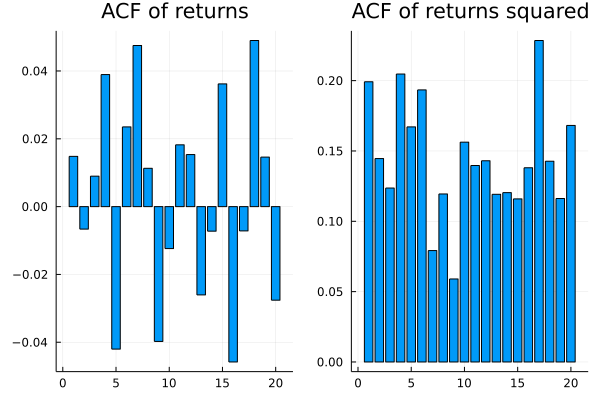

In [14]:
# ACF plots and the Ljung-Box test in Julia
# Listing 1.5/1.6
# Last updated July 2020
#
#


q1 = autocor(y, 1:20)
q2 = autocor(y.^2, 1:20)

plot(bar(q1, title = "ACF of returns"), 
    bar(q2, title = "ACF of returns squared"), legend = false)

In [15]:
# QQ plots in Julia
# Listing 1.7/1.8
# Last updated July 2020
#
#

using StatsPlots, Distributions;

plot(qqplot(Normal,float(y),qqline=:quantile, title = "QQPlot vs Normal"), 
    qqplot(TDist(5),float(y),qqline=:quantile, title = "QQPlot vs Student-t(5)"),
    qqplot(TDist(4),float(y),qqline=:quantile, title = "QQPlot vs Student-t(4)"),    
    qqplot(TDist(3),float(y),qqline=:quantile, title = "QQPlot vs Student-t(3)"))

In [16]:
# Download stock prices in Julia
# Listing 1.9/1.10
# Last updated June 2022
#
#

price = CSV.read("stocks.csv", DataFrame)
y1 = diff(log.(price[:,1]))
y2 = diff(log.(price[:,2]))
y3 = diff(log.(price[:,3]))
y = hcat(y1,y2,y3)

println(cor(y)) # correlation matrix

[1.0 0.22968418921898384 0.21261917993075263; 0.22968418921898384 1.0 0.1450510869692899; 0.21261917993075263 0.1450510869692899 1.0]


<a id='2'></a>
***

# Chapter 2: Univariate Volatility Modelling

-  2.1/2.2: GARCH and t-GARCH estimation
-  2.3/2.4: APARCH estimation

In [17]:
# ARCH and GARCH estimation in Julia
# Listing 2.1/2.2
# Last updated June 2022
#
#


using CSV, Statistics, DataFrames;
p = CSV.read("index.csv",DataFrame)
y = diff(log.(p[:,1]))*100
y = y .- mean(y)

using ARCHModels;

## ARCH(1)
arch1 = fit(ARCH{1}, y; meanspec = NoIntercept);
println("ARCH(1) model:", "\n", arch1)

## ARCH(4)
arch4 = fit(ARCH{4}, y; meanspec = NoIntercept);
println("ARCH(4) model:", "\n", arch4)

## Note: Order of GARCH arguments here is reversed
## First argument: lags for sigma, second argument: lags for returns squared

## GARCH(4,1)
garch4_1 = fit(GARCH{1,4}, y; meanspec = NoIntercept);
println("GARCH(4,1) model:", "\n", garch4_1)

## GARCH(1,1)
garch1_1 = fit(GARCH{1,1}, y; meanspec = NoIntercept);
println("GARCH(1,1) model:", "\n", garch1_1)

## tGARCH(1,1)
tgarch1_1 = fit(GARCH{1,1}, y; meanspec = NoIntercept, dist = StdT);
println("tGARCH(1,1) model:", "\n", tgarch1_1)

ARCH(1) model:

TGARCH{0, 0, 1} model with Gaussian errors, T=5676.


Volatility parameters:
───────────────────────────────────────────
    Estimate  Std.Error   z value  Pr(>|z|)
───────────────────────────────────────────
ω   0.684708  0.0405123  16.9012     <1e-63
α₁  0.340537  0.0559401   6.08753    <1e-08
───────────────────────────────────────────

ARCH(4) model:

TGARCH{0, 0, 4} model with Gaussian errors, T=5676.


Volatility parameters:
───────────────────────────────────────────
    Estimate  Std.Error   z value  Pr(>|z|)
───────────────────────────────────────────
ω   0.389725  0.0360422  10.813      <1e-26
α₁  0.178669  0.0360775   4.95236    <1e-06
α₂  0.153811  0.031418    4.89564    <1e-06
α₃  0.170989  0.0508433   3.36306    0.0008
α₄  0.143156  0.0342763   4.17653    <1e-04
───────────────────────────────────────────

GARCH(4,1) model:

GARCH{1, 4} model with Gaussian errors, T=5676.


Volatility parameters:
──────────────────────────────────────────────────
       Es

In [18]:
# Advanced ARCH and GARCH estimation in Julia
# Listing 2.3/2.4
# Last updated July 2020
#
#


leverage_garch1_1 = fit(TGARCH{1, 1,1}, y; meanspec = NoIntercept);
println("GARCH(1,1) with leverage effects model:", "\n", leverage_garch1_1)

## There is no package for apARCH estimation in Julia at present

GARCH(1,1) with leverage effects model:

TGARCH{1, 1, 1} model with Gaussian errors, T=5676.


Volatility parameters:
─────────────────────────────────────────────────
       Estimate  Std.Error      z value  Pr(>|z|)
─────────────────────────────────────────────────
ω   0.00617917   0.0143054  0.431945       0.6658
γ₁  1.71057e-49  0.133853   1.27795e-48    1.0000
β₁  0.908651     1.37153    0.662511       0.5076
α₁  0.114176     2.64715    0.0431318      0.9656
─────────────────────────────────────────────────



<a id='3'></a>
***

# Chapter 3: Multivariate Volatility Models

-  3.1/3.2: Loading hypothetical stock prices
-  3.3/3.4: EWMA estimation
-  3.5/3.6: OGARCH estimation (unavailable as of June 2018)
-  3.7/3.8: DCC estimation (unavailable as of June 2018)
-  3.9/3.10: Comparison of EWMA, OGARCH, DCC (unavailable as of June 2018)

In [19]:
# Download stock prices in Julia
# Listing 3.1/3.2
# Last updated June 2022
#
#

using CSV, Statistics, DataFrames;

p = CSV.read("stocks.csv", DataFrame);
y1 = diff(log.(p[:,1])).*100; # consider first two stocks
y2 = diff(log.(p[:,2])).*100; # convert prices to returns
y1 = y1 .- mean(y1); # subtract mean
y2 = y2 .- mean(y2);

y = hcat(y1,y2);                  # combine both series horizontally

T = size(y,1);                    # get the length of time series

In [20]:
# EWMA in Julia
# Listing 3.3/3.4
# Last updated July 2020
#
#

## create a matrix to hold covariance matrix for each t 
EWMA = fill(NaN, (T,3))
lambda = 0.94
S = cov(y)                                        # initial (t=1) covar matrix

EWMA[1,:] = [S[1], S[4], S[2]]                    # extract var and covar

for i in 2:T                                      # loop though the sample
    S = lambda*S + (1-lambda)*y[i-1,:]*(y[i-1,:])'
    EWMA[i,:] = [S[1], S[4], S[2]]                # convert matrix to vector
end

EWMArho = EWMA[:,3]./sqrt.(EWMA[:,1].*EWMA[:,2]);  # calculate correlations

In [21]:
# OGARCH in Julia
# Listing 3.5/3.6
# Last updated July 2020
#
#

## No OGARCH code available in Julia at present

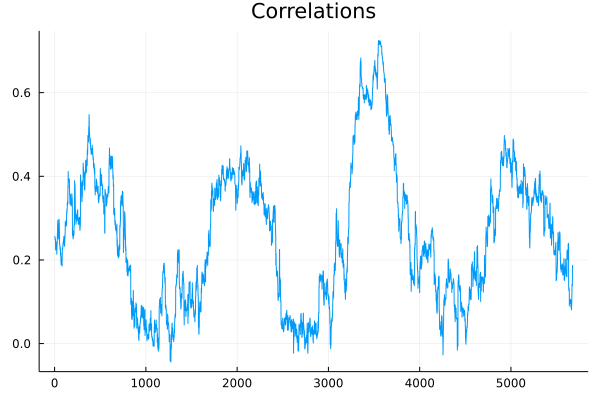

In [22]:
# DCC in Julia
# Listing 3.7/3.8
# Last updated July 2020
#
#

using ARCHModels, Plots;

## Multivariate models in ARCHModel package
dcc = fit(DCC{1, 1, GARCH{1, 1}}, y; meanspec = NoIntercept);

## Access covariances
H = covariances(dcc);

## Getting correlations
DCCrho = [correlations(dcc)[i][1,2] for i = 1:T];
plot(DCCrho, title = "Correlations", legend = false)

In [23]:
# Correlation comparison in Julia
# Listing 3.9/3.10
# Last updated July 2020
#
#

## No OGARCH code available in Julia at present

<a id='4'></a>
***

# Chapter 4: Risk Measures

-  4.1/4.2: Expected Shortfall (ES) estimation under normality assumption

In [24]:
# ES in Julia
# Listing 4.1/4.2
# Last updated June 2018
#
#

using Distributions;
p = [0.5, 0.1, 0.05, 0.025, 0.01, 0.001]
VaR = quantile.(Normal(0,1), p)
ES = pdf.(Normal(0,1), quantile.(Normal(0,1),p))./p

println(ES)

[0.7978845608028654, 1.7549833193248683, 2.0627128075074266, 2.3378027922013915, 2.6652142203457747, 3.3670900770639447]


<a id='5'></a>
***

# Chapter 5: Implementing Risk Forecasts

-  5.1/5.2: Loading hypothetical stock prices, converting to returns
-  5.3/5.4: Univariate HS Value at Risk (VaR)
-  5.5/5.6: Multivariate HS VaR
-  5.7/5.8: Univariate ES VaR
-  5.9/5.10: Normal VaR
-  5.11/5.12: Portfolio Normal VaR
-  5.13/5.14: Student-t VaR (unavailable as of June 2018)
-  5.15/5.16: Normal ES VaR
-  5.17/5.18: Direct Integration Normal ES VaR
-  5.19/5.20: MA Normal VaR
-  5.21/5.22: EWMA VaR
-  5.23/5.24: Two-asset EWMA VaR
-  5.25/5.26: GARCH(1,1) VaR

In [25]:
# Download stock prices in Julia
# Listing 5.1/5.2
# Last updated June 2022
#
#

using CSV, DataFrames;
p = CSV.read("stocks.csv", DataFrame);

## Convert prices of first two stocks to returns
y1 = diff(log.(p[:,1]));
y2 = diff(log.(p[:,2]));

y = hcat(y1,y2);
T = size(y,1); 
value = 1000; # portfolio value 
p = 0.01;     # probability

In [26]:
# Univariate HS in Julia
# Listing 5.3/5.4
# Last updated July 2020
#
#

ys = sort(y1)            # sort returns
op = ceil(Int, T*p)      # p percent smallest, rounding up
VaR1 = -ys[op] * value
println("Univariate HS VaR ", Int(p*100), "%: ", round(VaR1, digits = 3), " USD")

Univariate HS VaR 1%: 17.498 USD


In [27]:
# Multivariate HS in Julia
# Listing 5.5/5.6
# Last updated July 2020
#
#

w = [0.3; 0.7]          # vector of portfolio weights
yp = y * w              # portfolio returns
yps = sort(yp)
VaR2 = -yps[op] * value
println("Multivariate HS VaR ", Int(p*100), "%: ", round(VaR2, digits = 3), " USD")

Multivariate HS VaR 1%: 18.726 USD


In [28]:
# Univariate ES in Julia
# Listing 5.7/5.8
# Last updated July 2020
#
#

using Statistics;
ES1 = -mean(ys[1:op]) * value
println("ES: ", round(ES1, digits = 3), " USD")

ES: 22.563 USD


In [29]:
# Normal VaR in Julia
# Listing 5.9/5.10
# Last updated July 2020
#
#

using Distributions;

sigma = std(y1);      # estimate volatility
VaR3 = -sigma * quantile(Normal(0,1),p) * value
println("Normal VaR", Int(p*100), "%: ", round(VaR3, digits = 3), " USD")

Normal VaR1%: 14.95 USD


In [30]:
# Portfolio normal VaR in Julia
# Listing 5.11/5.12
# Last updated July 2020
#
#

sigma = sqrt(w'*cov(y)*w)   # portfolio volatility
VaR4 = -sigma * quantile(Normal(0,1), p) * value
println("Portfolio normal VaR", Int(p*100), "%: ", round(VaR4, digits = 3), " USD")

Portfolio normal VaR1%: 17.041 USD


In [31]:
# Student-t VaR in Julia
# Listing 5.13/5.14
# Last updated July 2020
#
#


## Julia does not have a function for fitting Student-t data yet
## Currently: there exists Distributions.jl with fit_mle
## usage: Distributions.fit_mle(Dist_name, data[, weights])
##
## using Distributions;
## res = fit_mle(TDist, y1)
## nu = res.ν (this is the Greek letter nu, not Latin v)
## sigma = sqrt(nu/(nu-2))
## VaR5 = -sigma * quantile(TDist(nu), p) * value

In [32]:
# Normal ES in Julia
# Listing 5.15/5.16
# Last updated July 2020
#
#

sigma = std(y1)
ES2 = sigma * pdf(Normal(0,1), (quantile(Normal(0,1), p))) / p * value
println("Normal ES: ", round(ES2, digits = 3), " USD")

Normal ES: 17.127 USD


In [33]:
# Direct integration ES in Julia
# Listing 5.17/5.18
# Last updated July 2020
#
#

using QuadGK;

VaR = -quantile(Normal(0,1), p)
integrand(x) = x * pdf(Normal(0,1), x)
ES3 = -sigma * quadgk(integrand, -Inf, -VaR)[1] / p * value
println("Normal integrated ES: ", round(ES3, digits = 3), " USD")

Normal integrated ES: 17.127 USD


In [34]:
# MA normal VaR in Julia
# Listing 5.19/5.20
# Last updated July 2020
#
#


WE = 20
for t in T-5:T
    t1 = t-WE
    window = y1[t1+1:t] # estimation window
    sigma = std(window)
    VaR6 = -sigma*quantile(Normal(0,1),p)*value
    println("MA Normal VaR", Int(p*100), "% using observations ", t1, " to ", t, ": ",
        round(VaR6, digits = 3), " USD")
end

MA Normal VaR1% using observations 5651 to 5671: 16.05 USD
MA Normal VaR1% using observations 5652 to 5672: 16.149 USD
MA Normal VaR1% using observations 5653 to 5673: 18.854 USD
MA Normal VaR1% using observations 5654 to 5674: 18.882 USD
MA Normal VaR1% using observations 5655 to 5675: 16.231 USD
MA Normal VaR1% using observations 5656 to 5676: 16.17 USD


In [35]:
# EWMA VaR in Julia
# Listing 5.21/5.22
# Last updated July 2020
#
#


lambda = 0.94
s11 = var(y1) # initial variance

for t in 2:T
    s11 = lambda * s11 + (1-lambda) * y1[t-1]^2 
end

VaR7 = -sqrt(s11) * quantile(Normal(0,1), p) * value
println("EWMA VaR ", Int(p*100), "%: ", round(VaR7, digits = 3), " USD")

EWMA VaR 1%: 16.753 USD


In [36]:
# Two-asset EWMA VaR in Julia
# Listing 5.23/5.24
# Last updated July 2020
#
#


s = cov(y) # initial covariance
for t in 2:T
    s = lambda * s + (1-lambda) * y[t-1,:] * (y[t-1,:])'
end

sigma = sqrt(w'*s*w) # portfolio vol

VaR8 = -sigma * quantile(Normal(0,1), p) * value
println("Two-asset EWMA VaR ", Int(p*100), "%: ", round(VaR8, digits = 3), " USD")

Two-asset EWMA VaR 1%: 20.504 USD


In [37]:
# GARCH VaR in Julia
# Listing 5.25/5.26
# Last updated July 2020
#
#

## We use the ARCHModels package

using ARCHModels;

garch1_1 = fit(GARCH{1,1}, y1; meanspec = NoIntercept);

## In-sample GARCH VaR - Use the VaRs function

garch_VaR_in = VaRs(garch1_1, :0.01)

## Out-of-sample GARCH VaR - Use the predict function

cond_vol = predict(garch1_1, :volatility)     # 1-day-ahead conditional volatility
garch_VaR_out = -cond_vol * quantile(garch1_1.dist, p) * value

println("GARCH VaR ", Int(p*100), "%: ", round(garch_VaR_out, digits = 3), " USD")

GARCH VaR 1%: 16.888 USD


<a id='6'></a>
***

# Chapter 6: Analytical Value-at-Risk for Options and Bonds

-  6.1/6.2: Black-Scholes function definition
-  6.3/6.4: Black-Scholes option price calculation example

In [38]:
# Black-Scholes function in Julia
# Listing 6.1/6.2
# Last updated July 2020
#
#

using Distributions;

##If using function_name(;) to define a function,
##you need to supply argument names when calling the functions
function bs(; X = 1, P = 1, r = 0.05, sigma = 1, T = 1)
#function bs(X, P, r, sigma, T)
    d1 = (log.(P/X) .+ (r .+ 0.5 .* sigma.^2).*T)./(sigma .* sqrt.(T))
    d2 = d1 .- sigma * sqrt.(T)

    Call = P .* cdf.(Normal(0,1), d1) .- X .* exp.(-r * T) .* cdf.(Normal(0,1), d2)
    Put = X .* exp(-r .* T) .* cdf.(Normal(0,1),-d2) .- P .* cdf.(Normal(0,1), -d1)
    Delta_Call = cdf.(Normal(0,1), d1)
    Delta_Put = Delta_Call .- 1
    Gamma = pdf.(Normal(0,1), d1) ./ (P .* sigma .* sqrt(T))

    return Dict("Call" => Call, "Put" => Put, "Delta_Call" => Delta_Call, "Delta_Put" => Delta_Put, "Gamma" => Gamma)
end

bs (generic function with 1 method)

In [39]:
# Black-Scholes in Julia
# Listing 6.3/6.4
# Last updated July 2020
#
#

f = bs(X = 90, P = 100, r = 0.05, sigma = 0.2, T = 0.5)

Dict{String, Float64} with 5 entries:
  "Delta_Call" => 0.839523
  "Gamma"      => 0.0172383
  "Delta_Put"  => -0.160477
  "Call"       => 13.4985
  "Put"        => 1.27641

<a id='7'></a>
***

# Chapter 7: Simulation Methods for VaR for Options and Bonds

-  7.1/7.2: Plotting normal distribution transformation
-  7.3/7.4: Random number generation from Uniform(0,1), Normal(0,1)
-  7.5/7.6: Bond pricing using yield curve
-  7.7/7.8: Yield curve simulations
-  7.9/7.10: Bond price simulations
-  7.11/7.12: Black-Scholes analytical pricing of call
-  7.13/7.14: Black-Scholes Monte Carlo simulation pricing of call
-  7.15/7.16: Option density plots
-  7.17/7.18: VaR simulation of portfolio with only underlying
-  7.19/7.20: VaR simulation of portfolio with only call
-  7.21/7.22: VaR simulation of portfolio with call, put and underlying
-  7.23/7.24: Simulated two-asset returns
-  7.25/7.26: Two-asset portfolio VaR
-  7.27/7.28: Two-asset portfolio VaR with a call

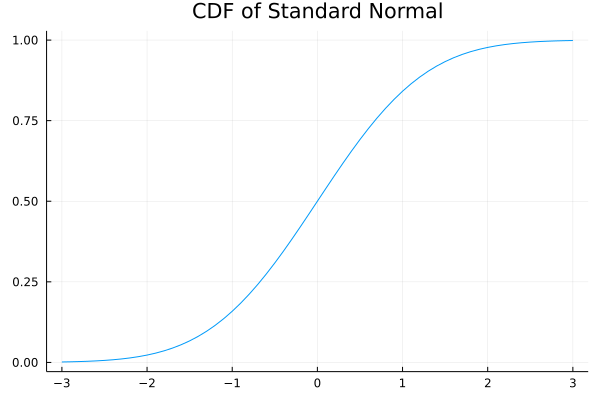

In [40]:
# Transformation in Julia
# Listing 7.1/7.2
# Last updated July 2020
#
#

x = -3:0.1:3

using Distributions, Plots;
return plot(x, cdf.(Normal(0,1), x), title = "CDF of Standard Normal", legend = false)

In [41]:
# Various RNs in Julia
# Listing 7.3/7.4
# Last updated July 2020
#
#

using Random;

Random.seed!(12);     # set seed
S = 10;
println(S, " draws from Uniform(0,1): \n", rand(Uniform(0,1), S), "\n") # alternatively, rand(S)
println(S, " draws from Normal(0,1): \n", rand(Normal(0,1), S), "\n")   # alternatively, randn(S)
println(S, " draws from Student-t(4): \n", rand(TDist(4), S), "\n")

10 draws from Uniform(0,1): 
[0.6252793454649989, 0.8503111061073503, 0.8012722598152027, 0.31835050331189974, 0.5424733827754756, 0.9075122021077182, 0.4754539710048189, 0.21372303013627492, 0.21508214233991207, 0.9525311666743481]

10 draws from Normal(0,1): 
[1.2988656648201078, 0.40453488944972393, 1.236329101324653, 0.6254079988046173, -1.064533109811951, -0.5733765018849499, -1.0745623136417815, 0.5687509623881172, -0.0010971638084546161, -0.6106652573206385]

10 draws from Student-t(4): 
[2.149332014643666, 0.7518391592954294, -0.9439455790006178, 0.8179982103282871, 0.17908155546694898, -1.1631714643859874, 1.5576932373015864, -1.99701576614911, 0.44376971060284626, 0.8239303631541971]



In [42]:
# Price bond in Julia
# Listing 7.5/7.6
# Last updated July 2020
#
#

yield_c = [5.00, 5.69, 6.09, 6.38, 6.61,
           6.79, 6.94, 7.07, 7.19, 7.30] # yield curve

T = length(yield_c)
r = 0.07                                 # initial yield rate
Par = 10                                 # par value
coupon = r * Par                         # coupon payments
cc = repeat([coupon], outer = 10)        # vector of cash flows
cc[T] += Par                             # add par to cash flows
P = sum(cc./((1 .+ yield_c/100).^(1:T))) # calc price
println("Price of the bond: ", round(P, digits = 3), " USD")

Price of the bond: 9.913 USD


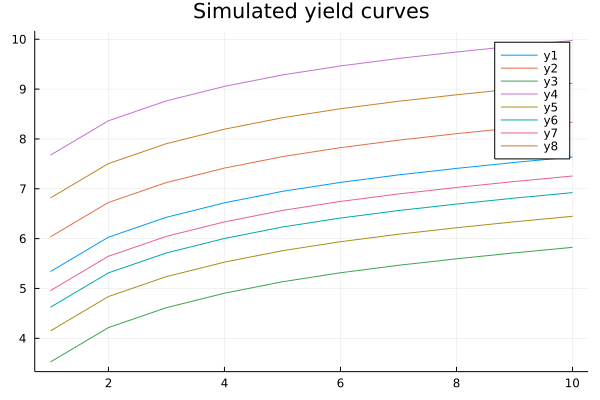

In [43]:
# Simulate yields in Julia
# Listing 7.7/7.8
# Last updated July 2020
#
#


Random.seed!(12)                # set seed
sigma = 1.5              # daily yield volatility
S = 8                    # number of simulations
r = rand(Normal(0,1), S) # generate random numbers
ysim = fill(NaN, (T,S))

for i in 1:S
    ysim[:,i] = yield_c .+ r[i]
end

plot(ysim, title = "Simulated yield curves")

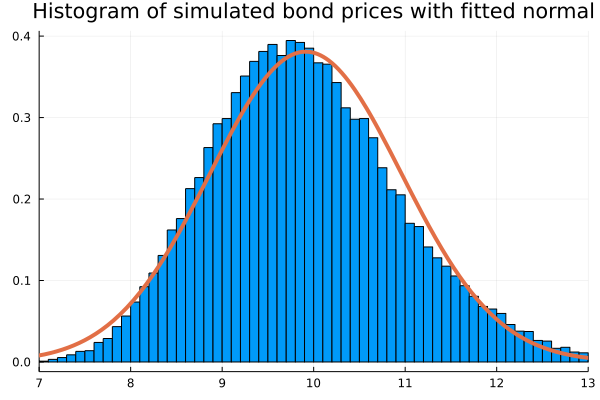

In [44]:
# Simulate bond prices in Julia
# Listing 7.9/7.10
# Last updated July 2020
#
#


using Statistics, StatsPlots;

SP = fill(NaN, S)

for i in 1:S  # S simulations
    SP[i] = sum(cc./(1 .+ ysim[:,i]./100).^(1:T))
end

SP .-= (mean(SP) - P) # correct for mean

bar(SP)

S = 50000
r = randn(S) * sigma

ysim = fill(NaN, (T,S))
for i in 1:S
    ysim[:,i] = yield_c .+ r[i]
end

SP = fill(NaN, S)
for i in 1:S
    SP[i] = sum(cc./(1 .+ ysim[:,i]./100).^(1:T))
end

SP .-= (mean(SP) - P)

histogram(SP,nbins=100,normed=true,xlims=(7,13), legend = false, title = "Histogram of simulated bond prices with fitted normal")
res = fit_mle(Normal, SP)
plot!(Normal(res.μ, res.σ), linewidth = 4, legend = false)

In [45]:
# Simulate bond prices in Julia
# Listing 7.11/7.12
# Last updated June 2022
#
#

P0 = 50     # initial spot price
sigma = 0.2 # annual volatility
r = 0.05    # annual interest
T = 0.5     # time to expiration
X = 40      # strike price

f = bs(X = X, P = P0, r = r, sigma = sigma, T = T) # analytical call price
## This calculation uses the Black-Scholes pricing function (Listing 6.1/6.2)

Dict{String, Float64} with 5 entries:
  "Delta_Call" => 0.966026
  "Gamma"      => 0.0106638
  "Delta_Put"  => -0.0339741
  "Call"       => 11.0873
  "Put"        => 0.0996772

In [46]:
# Black-Scholes simulation in Julia
# Listing 7.13/7.14
# Last updated July 2020
#
#


Random.seed!(12)        # set seed
S = 10^6                # number of simulations
ysim = randn(S) * sigma * sqrt(T) .- 0.5 * sigma^2 * T # sim returns, lognorm corrected
F = P0 * exp(r * T) * exp.(ysim)            # simulated future prices
SP = F .- X              # payoff
SP[SP.<0] .= 0           # set negative outcomes to zero
fsim = SP * exp(-r * T) # discount

call_sim = mean(fsim)     # simulated price
println("Simulated call price: ", round(call_sim, digits = 3))

Simulated call price: 11.09


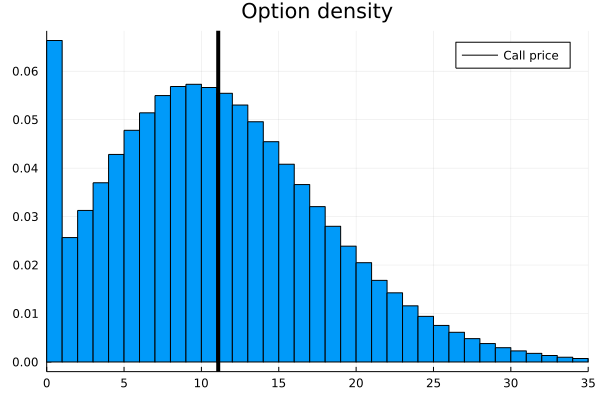

In [47]:
# Option density plots in Julia
# Listing 7.15/7.16
# Last updated July 2020
#
#

histogram(F, bins = 100, normed = true, xlims = (20,80), title = "Simulated prices density", label = false)
res = fit_mle(Normal, F)
plot!(Normal(res.μ, res.σ), linewidth = 4, label = "Fitted normal")
vline!([X], linewidth = 4, color = "black", label = "Strike price")

histogram(fsim, bins = 110, normed = true, xlims = (0,35), title = "Option density", label = false)
vline!([f["Call"]], linewidth = 4, color = "black", label = "Call price")

In [48]:
# Simulate VaR in Julia
# Listing 7.17/7.18
# Last updated July 2020
#
#


Random.seed!(1)                                     # set seed
S = 10^7                                            # number of simulations
s2 = 0.01^2                                         # daily variance
p = 0.01                                            # probability
r = 0.05                                            # annual riskfree rate
P = 100                                             # price today
ysim = randn(S) * sqrt(s2) .+ r/365 .- 0.5 * s2     # sim returns
Psim = P * exp.(ysim)                               # sim future prices
q = sort(Psim .- P)                                 # simulated P/L
VaR1 = -q[ceil(Int, p*S)]

println("Simulated VaR", ceil(Int, p*100), "%: ", round(VaR1, digits = 3), " USD")

Simulated VaR1%: 2.29 USD


In [49]:
# Simulate option VaR in Julia
# Listing 7.19/7.20
# Last updated June 2022
#
#

T = 0.25                            # time to expiration
X = 100                             # strike price
sigma = sqrt(s2 * 250)              # annual volatility
f = bs(X = X,P = P,r = r,sigma = sigma,T = T)               # analytical call price
fsim = bs(X = X,P = Psim, r = r, sigma = sigma, T = T-(1/365)) # sim option prices
q = sort(fsim["Call"] .- f["Call"])  # simulated P/L
VaR2 = -q[ceil(Int, p*S)]

println("Simulated Option VaR", ceil(Int, p*100), "%: ", round(VaR2, digits = 3), " USD")

Simulated Option VaR1%: 1.215 USD


In [50]:
# Example 7.3 in Julia
# Listing 7.21/7.22
# Last updated June 2022
#
#

X1 = 100
X2 = 110
f1 = bs(X = X1,P = P,r = r,sigma = sigma,T = T)
f2 = bs(X = X2,P = P,r = r,sigma = sigma,T = T)
f2sim = bs(X = X2,P = Psim,r = r,sigma = sigma,T = T-(1/365))
f1sim = bs(X = X1,P = Psim,r = r,sigma = sigma,T = T-(1/365))
q = sort(f1sim["Call"] .+ f2sim["Put"] .+ Psim .- f1["Call"] .- f2["Put"] .- P)
VaR3 = -q[ceil(Int, p*S)]

println("Portfolio Option VaR", ceil(Int, p*100), "%: ", round(VaR3, digits = 3), " USD")

Portfolio Option VaR1%: 1.495 USD


In [51]:
# Simulated two-asset returns in Julia
# Listing 7.23/7.24
# Last updated July 2020
#
#

Random.seed!(12);                          # set seed
mu = Vector([r/365, r/365]);        # return mean
Sigma = [0.01 0.0005; 0.0005 0.02]; # covariance matrix
y = rand(MvNormal(mu,Sigma), S);    # simulated returns

In [52]:
# Two-asset VaR in Julia
# Listing 7.25/7.26
# Last updated July 2020
#
#

K = 2
P = [100 50]                       # prices
x = [1 1]                          # number of assets
Port = reshape(P * x', 1)[1]       # portfolio at t
Psim = repeat(P, outer = [S,1]).*exp.(y)'   # simulated prices
PortSim = reshape(Psim * x', S)    # simulated portfolio value
q = sort(PortSim .- Port)           # simulated P/L
VaR4 = -q[ceil(Int, p * S)]

println("Two-asset VaR", ceil(Int, p*100), "%: ", round(VaR4, digits = 3), " USD")

Two-asset VaR1%: 25.944 USD


In [53]:
# A two-asset case in Julia with an option
# Listing 7.27/7.28
# Last updated June 2022
#
#

f = bs(X = P[2], P = P[2], r = r, sigma = sigma, T = T)
fsim = bs(X = P[2], P = Psim[:,2], r = r, sigma = sigma, T = T-(1/365))
q = sort(fsim["Call"] .+ Psim[:,1] .- f["Call"] .- P[1])
VaR5 = -q[ceil(Int, p * S)]

println("Two-asset with option VaR", ceil(Int, p*100), "%: ", round(VaR5, digits = 3), " USD")

Two-asset with option VaR1%: 20.788 USD


<a id='8'></a>
***

# Chapter 8: Backtesting and Stress Testing

-  8.1/8.2: Loading hypothetical stock prices, converting to returns
-  8.3/8.4: Setting up backtest 
-  8.5/8.6: Running backtest for EWMA/MA/HS/GARCH VaR
-  8.7/8.8: Backtesting analysis for EWMA/MA/HS/GARCH VaR
-  8.9/8.10: Bernoulli coverage test
-  8.11/8.12: Independence test
-  8.13/8.14: Running Bernoulli/Independence test on backtests
-  8.15/8.16: Running backtest for EWMA/HS ES
-  8.17/8.18: Backtesting analysis for EWMA/HS ES

In [54]:
# Load data in Julia
# Listing 8.1/8.2
# Last updated June 2022
#
#

using CSV, DataFrames;
price = CSV.read("index.csv", DataFrame);
y = diff(log.(price[:,1])); # get returns

In [55]:
# Set backtest up in Julia
# Listing 8.3/8.4
# Last updated July 2020
#
#

using Statistics;
T = length(y)                         # number of obs for return y
WE = 1000                             # estimation window length
p = 0.01                              # probability
l1 = ceil(Int, WE*p)                  # HS observation
value = 1                             # portfolio value
VaR = fill(NaN, (T,4))                # matrix for forecasts

## EWMA setup
lambda = 0.94
s11 = var(y)

for t in 2:WE
    s11=lambda*s11+(1-lambda)*y[t-1]^2
end

In [56]:
# Running backtest in Julia
# Listing 8.5/8.6
# Last updated July 2020
#
#

using Distributions, ARCHModels;

for t in WE+1:T
    t1 = t - WE                          # start of data window
    t2 = t - 1                           # end of data window
    window = y[t1:t2]                    # data for estimation
    
    s11 = lambda * s11 + (1-lambda) * y[t-1]^2
    VaR[t,1]= -quantile(Normal(0,1),p) * sqrt(s11) * value   # EWMA
    
    VaR[t,2]= -std(window) * quantile(Normal(0,1),p) * value # MA
    
    ys = sort(window)
    VaR[t,3] = -ys[l1] * value # HS
    
    garch1_1 = fit(GARCH{1,1}, window; meanspec = NoIntercept);
    cond_vol = predict(garch1_1, :volatility)
    VaR[t,4]= -cond_vol * quantile(Normal(0,1),p) * value # GARCH(1,1)
end

EWMA
VR: 2.074 VaR volatility: 0.0121
MA
VR: 1.861 VaR volatility: 0.0066
HS
VR: 1.24 VaR volatility: 0.0123
GARCH
VR: 1.668 VaR volatility: 0.0118


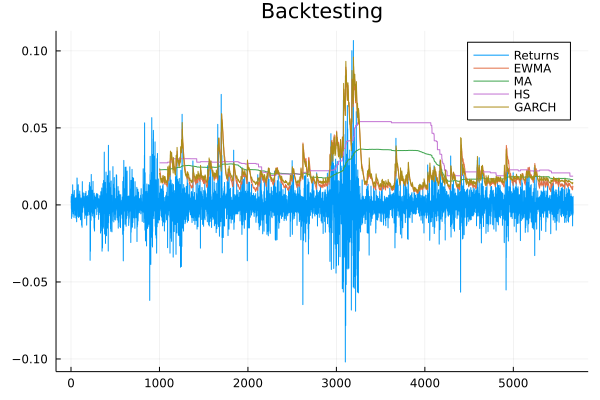

In [57]:
# Backtesting analysis in Julia
# Listing 8.7/8.8
# Last updated July 2020
#
#

using Plots;
W1 = WE + 1
names = ["Returns" "EWMA" "MA" "HS" "GARCH"]
for i in 1:4
    VR = sum(y[W1:T] .< -VaR[W1:T, i]) / (p * (T - WE))
    s = std(VaR[W1:T,i])
    println(names[i+1], "\n", "VR: ", round(VR, digits = 3), " VaR volatility: ", round(s, digits = 4))
end

plot([y, VaR[:,1], VaR[:,2], VaR[:,3], VaR[:,4]], label = names, title = "Backtesting")

In [58]:
# Bernoulli coverage test in Julia
# Listing 8.9/8.10
# Last updated June 2018
#
#

function bern_test(p,v)
    lv = length(v)
    sv = sum(v)

    al = log(p)*sv + log(1-p)*(lv-sv)
    bl = log(sv/lv)*sv + log(1-sv/lv)*(lv-sv)

    return (-2*(al-bl))
end

bern_test (generic function with 1 method)

In [59]:
# Independence test in Julia
# Listing 8.11/8.12
# Last updated July 2020
#
#

function ind_test(V)
    J = fill(0, (T,4))
    for i in 2:length(V)
        J[i,1] = (V[i-1] == 0) & (V[i] == 0)
        J[i,2] = (V[i-1] == 0) & (V[i] == 1)
        J[i,3] = (V[i-1] == 1) & (V[i] == 0)
        J[i,4] = (V[i-1] == 1) & (V[i] == 1)
    end

    V_00 = sum(J[:,1])
    V_01 = sum(J[:,2])
    V_10 = sum(J[:,3])
    V_11 = sum(J[:,4])

    p_00=V_00/(V_00+V_01)
    p_01=V_01/(V_00+V_01)
    p_10=V_10/(V_10+V_11)
    p_11=V_11/(V_10+V_11)

    hat_p = (V_01+V_11)/(V_00+V_01+V_10+V_11)
    al = log(1-hat_p)*(V_00+V_10) + log(hat_p)*(V_01+V_11)
    bl = log(p_00)*V_00 + log(p_01)*V_01 + log(p_10)*V_10 + log(p_11)*V_11

    return (-2*(al-bl))
end

ind_test (generic function with 1 method)

In [60]:
# Backtesting S&P 500 in Julia
# Listing 8.13/8.14
# Last updated July 2020
#
#


W1 = WE+1
ya = y[W1:T]
VaRa = VaR[W1:T,:]
names = ["EWMA", "MA", "HS", "GARCH"]

for i in 1:4
    q = y[W1:T] .< -VaR[W1:T,i]
    v = VaRa .* 0
    v[q,i] .= 1
    ber = bern_test(p, v[:,i])
    ind = ind_test(v[:,i])
    println(names[i], "\n", 
        "Bernoulli statistic: ", round(ber, digits = 2), " p-value: ", round(1-cdf(Chisq(1), ber), digits = 4), "\n",
        "Independence statistic: ", round(ind, digits = 2), " p-value: ", round(1-cdf(Chisq(1), ind), digits = 4), "\n")
end

EWMA
Bernoulli statistic: 41.63 p-value: 0.0
Independence statistic: 0.44 p-value: 0.5066

MA
Bernoulli statistic: 27.9 p-value: 0.0
Independence statistic: 17.44 p-value: 0.0

HS
Bernoulli statistic: 2.54 p-value: 0.1113
Independence statistic: 11.48 p-value: 0.0007

GARCH
Bernoulli statistic: 17.55 p-value: 0.0
Independence statistic: 0.33 p-value: 0.563



In [61]:
# Backtest ES in Julia
# Listing 8.15/8.16
# Last updated July 2020
#
#


VaR = fill(NaN, (T,2)) # VaR forecasts
ES = fill(NaN, (T,2))  # ES forecasts

for t in WE+1:T
    t1 = t - WE
    t2 = t - 1
    window = y[t1:t2]

    s11 = lambda*s11+(1-lambda)*y[t-1]^2
    VaR[t,1]=-quantile(Normal(0,1),p)*sqrt(s11)*value # EWMA
    ES[t,1]=sqrt(s11)*pdf(Normal(0,1),quantile(Normal(0,1),p))/p

    ys = sort(window)
    VaR[t,2] = -ys[l1] * value # HS
    ES[t,2] = -mean(ys[1:l1]) * value
end

In [62]:
# ES in Julia
# Listing 8.17/8.18
# Last updated July 2020
#
#


ESa = ES[W1:T,:]
VaRa = VaR[W1:T,:]
m = ["EWMA", "HS"]
for i in 1:2
    q = ya .<= -VaRa[:,i]
    nES = mean(ya[q] ./ -ESa[q,i])
    println(m[i], " nES: ", round(nES, digits = 3))
end

EWMA nES: 1.224
HS nES: 1.054


<a id='9'></a>
***

# Chapter 9: Extreme Value Theory

-  9.1/9.2: Calculation of tail index from returns

In [63]:
# Hill estimator in Julia
# Listing 9.1/9.2
# Last updated June 2018
#
#

ysort = sort(y) # sort the returns
CT = 100        # set the threshold
iota = 1/mean(log.(ysort[1:CT]/ysort[CT+1])) # get the tail index

# END

2.62970984651441